First up importing all things I might need:

In [218]:
# tools from the python standard lib
from collections import defaultdict, namedtuple, Counter
from functools import reduce
import hashlib
import re
from time import sleep
import operator
from functools import lru_cache

# external libs
import requests
import numpy as np
import pandas as pd
from tqdm import tnrange, tqdm_notebook

# visualization stuff
from plotly.offline import iplot
import plotly.graph_objs as go
import ipywidgets as ipw

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import clear_output, display, Markdown

A few helper functions:

In [2]:
def print_md(txt="## testing"):
    display(Markdown(txt))

def get_input(day=1):
    with open(f'data/advent_2015/{day}.txt') as f:
        data = f.read().strip()
    return data

# Day 1 count chars in string

- `(` go up
- `)` go down

In [7]:
input_1 = get_input(1)
    
input_1.count("(") - input_1.count(")")

138

## When do we get to the the basement at floor `-1`?

So lets track the position one move at a time:

## On floor  -1

Timesteps to reach the basement:  1771


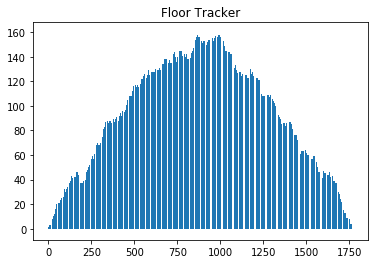

In [7]:
floor = 0
floors = []
for i, mv in enumerate(input_1):
    if mv == "(":
        floor += 1
    else:
        floor -= 1
    
    floors.append(floor)
    clear_output(True)
    print_md(f"## On floor {floor:3}")
    
    if floor == -1:
        print(f"Timesteps to reach the basement: ", i + 1)
        break

plt.title("Floor Tracker")
plt.bar([i for i in range(len(floors))], floors);

# Day 2 Calculate areas

We need to figure out the amount of wrapping paper needed to wrap a bunch of presents.

We've got a list of the dimensions (length l, width w, and height h) of each present.

Every present is a box (a perfect right rectangular prism), which makes calculating the required wrapping paper for each gift a little easier: find the surface area of the box, which is `2*l*w + 2*w*h + 2*h*l`. The elves also need a little extra paper for each present: the area of the smallest side.

- A present with dimensions 2x3x4 requires 2*6 + 2*12 + 2*8 = 52 square feet of wrapping paper plus 6 square feet of slack, for a total of 58 square feet.
- A present with dimensions 1x1x10 requires 2*1 + 2*10 + 2*10 = 42 square feet of wrapping paper plus 1 square foot of slack, for a total of 43 square feet.

**How many total square feet of wrapping paper should they order?**

In [8]:
input_2 = get_input(2).split("\n")
input_2[:5]

['29x13x26', '11x11x14', '27x2x5', '6x10x13', '15x19x10']

First up, splitting it into a list of ints:

In [6]:
data2 = [[int(x) for x in i.split("x")] for i in input_2]
data2[:5]

[[29, 13, 26], [11, 11, 14], [27, 2, 5], [6, 10, 13], [15, 19, 10]]

In [7]:
def get_area(present):
    """returns the area of one present"""
    l, w, h = present
    return np.prod(sorted(present)[:2]) + 2*l*w + 2*w*h + 2*h*l

get_area([2,3,4]), get_area([1,1,10])

(58, 43)

Now to calculate the area of all presents:

In [8]:
present_areas = [get_area(x) for x in data2]
np.sum(present_areas)

1586300

## Part 2 ribbon to wrap the present

The ribbon required to wrap a present is the shortest distance around its sides, or the smallest perimeter of any one face. Each present also requires a bow made out of ribbon as well; the feet of ribbon required for the perfect bow is equal to the cubic feet of volume of the present.

- A present with dimensions 2x3x4 requires 2+2+3+3 = 10 feet of ribbon to wrap the present plus 2*3*4 = 24 feet of ribbon for the bow, for a total of 34 feet.

- A present with dimensions 1x1x10 requires 1+1+1+1 = 4 feet of ribbon to wrap the present plus 1*1*10 = 10 feet of ribbon for the bow, for a total of 14 feet.

**How many total feet of ribbon should they order?**

In [15]:
def ribbon(present=[2,3,4]):
    """takes in present, returns length of ribbon needed to wrap"""
    l, w, h = sorted(present)
    return 2*l + 2*w + l*w*h
    
ribbon(), ribbon([1,1,10])

(34, 14)

In [16]:
ribbons = [ribbon(x) for x in data2]
np.sum(ribbons)

3737498

# Day 3 grid

2d grid with moves north (^), south (v), east (>), or west (<).

In [9]:
input_3 = get_input(3)

input_3[:280]

'^^<<v<<v><v^^<><>^^<v<v^>>^^^><^>v^>v><><><<vv^^<^>^^<v^>v>v^v>>>^<>v<^<v^><^>>>>><<v>>^>>^>v^>><<^>v>v<>^v^v^vvv><>^^>v><v<><>^><^^<vv^v<v>^v>>^v^>v><>v^<vv>^><<v^>vv^<<>v>>><<<>>^<vv<^<>^^vv>>>^><<<<vv^v^>>><><^>v<>^>v<v^v<^vv><^v^><<<<>^<>v>^v>v<v<v<<>v<^<<<v>>>>>^^v>vv^^<>^<>'

lets convert this to a plot

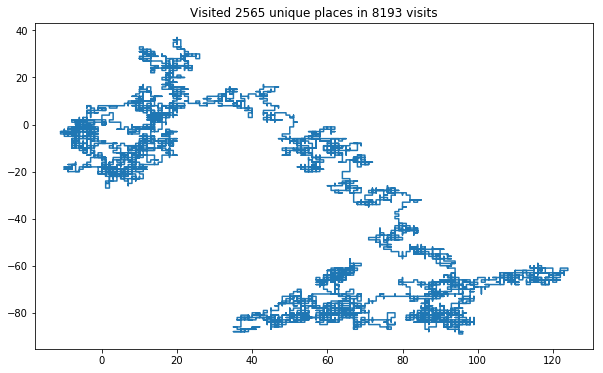

In [3]:
dirs = {"^": (0,1), ">": (1,0), "v": (0,-1), "<": (-1, 0)}

def get_moves(data):
    moves = [(0,0)]

    for mv in data:
        x, y = moves[-1]
        xx, yy = dirs[mv]
        moves.append((x + xx, y + yy))
    return moves

moves = get_moves(input_3)
c = Counter(moves)

x, y = zip(*moves)

f, ax = plt.subplots(figsize=(10,6))
plt.title(f"Visited {len(c)} unique places in {len(moves)} visits")
ax.plot(x,y);

Trying this out in plotly:

In [4]:
line = go.Scatter(x=x,y=y)
layout = go.Layout(title="This is a title", 
                   xaxis=dict(title="X axis title", range=[-50, 150]), 
                   yaxis=dict(title="Y", range=[-90,50]))
f = go.FigureWidget([line])
f

FigureWidget({
    'data': [{'type': 'scatter',
              'uid': '15c75f0a-d662-11e8-a2ac-4f7e302a5f68',
 …

We can animate santa!

In [5]:
for n in range(1,len(x), 200):
    sleep(0.05)
    line.update(x=x[:n],y=y[:n])
    f.update(data=[line])

## two santas 

Now we have two santas, each one moving from every alternative instruction. This is easy as we can just take the function above and use pythonic list ninja to get moves:

In [115]:
a = [1,2,3,4,5,6,7]
a[::2], a[1::2]

([1, 3, 5, 7], [2, 4, 6])

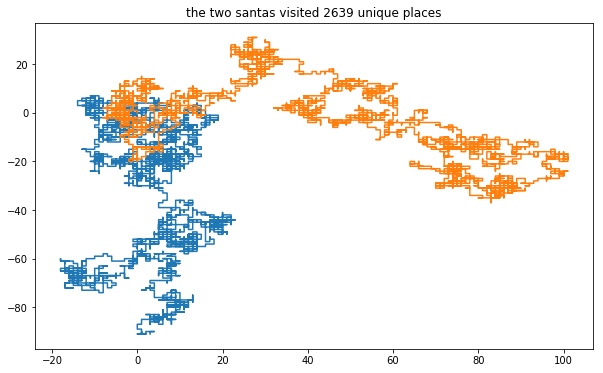

In [6]:
santa_1 = get_moves(input_3[::2])
santa_2 = get_moves(input_3[1::2])

two_santas = Counter(santa_1 + santa_2)

f, ax = plt.subplots(figsize=(10,6))
plt.title(f"the two santas visited {len(two_santas)} unique places")

for santa in santa_1, santa_2:
    x, y = zip(*santa)
    ax.plot(x,y)
plt.show()

In [7]:
x1, y1 = zip(*santa_1)
s1 = go.Scatter(x=x1[0:1], y=y1[0:1], name="Santa 1")
x2, y2 = zip(*santa_2)
s2 = go.Scatter(x=x2[0:1], y=y2[0:1], name="Santa 2")

layout=go.Layout(title=f"the two santas visited {len(two_santas)} unique places",
                xaxis=dict(title="X", range=[min(x1+x2), max(x1+x2)]), 
                yaxis=dict(title="Y", range=[min(y1+y2), max(y1+y2)]))
fig = go.FigureWidget([s1, s2], layout=layout)
fig

FigureWidget({
    'data': [{'name': 'Santa 1', 'type': 'scatter', 'uid': '2fe33ee0-d662-11e8-a2ac-4f7e302a5f6…

In [8]:
for i in range(1, len(santa_1), 150):
    with fig.batch_animate(duration=150):
        fig.data[0].x = x1[0:i]
        fig.data[0].y = y1[0:i]
        fig.data[1].x = x2[0:i]
        fig.data[1].y = y2[0:i]

# Day 4 find md5 hashes

In [194]:
input4 = "bgvyzdsv"
test = "abcdef" #609043
test2 = "pqrstuv" # 1048970

def make_hash(txt):
    return hashlib.md5(txt.encode("utf")).hexdigest()

make_hash(test), make_hash(test2)    

('e80b5017098950fc58aad83c8c14978e', 'd6ce49fc1a64ec3bb8e335b9e7a3e080')

In [200]:
s = "None"
i = 0

while not s.startswith("00000"):
    i += 1
    txt = input4 + str(i)
    s = make_hash(txt)
i, s

(254575, '000004b30d481662b9cb0c105f6549b2')

Not to find one starting with 6 zeros:

In [201]:
s = "None"
i = 0

while not s.startswith("000000"):
    i += 1
    txt = input4 + str(i)
    s = make_hash(txt)
i, s

(1038736, '000000b1b64bf5eb55aad89986126953')

# Day 5 find the nice strings

looking for strings which:

- at least three vowels (aeiou only), like aei, xazegov, or aeiouaeiouaeiou.
- at least one letter that appears twice in a row, like xx, abcdde (dd), or aabbccdd (aa, bb, cc, or dd).
- does not contain the strings ab, cd, pq, or xy, even if they are part of one of the other requirements.

First up, counting the vowels:

In [12]:
test = ["ugknbfddgicrmopn", "aaa", "jchzalrnumimnmhp", 
        "haegwjzuvuyypxyu", "dvszwmarrgswjxmb"]

vowels = "aeiou"

for s in test:
    v = len([char for char in s if char in vowels]) >= 3
    print(v)

True
True
True
True
False


Now to find a repeated char in a row:

In [14]:
regex = re.compile(r"([a-zA-Z])\1{1,}")
re.findall(regex, "a"), re.findall(regex, "aabbbb"), re.findall(regex, "abbcc")

([], ['a', 'b'], ['b', 'c'])

Now checking if it contains the forbidden strings:

In [15]:
bad_strings = ["ab", "cd", "pq", "xy"]
sum([s in "abc" for s in bad_strings])

1

Now to put it all together

In [16]:
def is_nice_string(txt):
    vowel_count = len([char for char in txt if char in vowels]) >= 3
    two_chars = len(re.findall(regex, txt)) > 0
    no_bad_str = True if (sum([s in txt for s in bad_strings]) == 0) else False
    
    return vowel_count and two_chars and no_bad_str

[is_nice_string(t) for t in test] #== [False, False, True, True, True]

[True, True, False, False, False]

Now to solve part 1:

In [18]:
input_5 = get_input(5).split("\n")
print("Number of nice strings: ", sum([is_nice_string(t) for t in input_5]))

Number of nice strings:  258


## Part 2

Now, a nice string is one with all of the following properties:

- It contains a pair of any two letters that appears at least twice in the string without overlapping, like xyxy (xy) or aabcdefgaa (aa), but not like aaa (aa, but it overlaps).
- It contains at least one letter which repeats with exactly one letter between them, like xyx, abcdefeghi (efe), or even aaa.

In [387]:
def has_two_chars(txt):
    regex = re.compile(r"([a-zA-Z]).*\1")
    m = re.findall(regex, txt)
    if len(m) == 0: return False
    for c in m:
        if c*3 in txt:
            return False
    return True

has_two_chars("aa"), has_two_chars("aba"), has_two_chars("aaa")

(True, True, False)

The second part is easier:

In [394]:
def day5_2(txt):
    regex = re.compile(r"([a-zA-Z])[A-Za-z]\1")
    if len(re.findall(regex, txt)) > 0:
        return True
    else:
        return False

False

In [395]:
sum([has_two_chars(t) and day5_2(t) for t in input_5])

395

# Day 6 Grids

We have a a million lights in a 1000x1000 grid. We get instructions to turn on or off lights:

- turn on 0,0 through 999,999 would turn on (or leave on) every light.
- toggle 0,0 through 999,0 would toggle the first line of 1000 lights, turning off the ones that were on, and turning on the ones that were off.
- turn off 499,499 through 500,500 would turn off (or leave off) the middle four lights.

In [19]:
input_6 = get_input(6).split("\n")
input_6[-5:]

['turn off 446,432 through 458,648',
 'turn on 715,871 through 722,890',
 'toggle 424,675 through 740,862',
 'toggle 580,592 through 671,900',
 'toggle 296,687 through 906,775']

Lets make the grid of lights:

In [129]:
grid = np.zeros([1000,1000])
grid.shape

(1000, 1000)

Using regex to extract the info we need form the commands:

In [181]:
re.findall("on|off", 'turn on 660,55 through 986,197')

['on']

Getting all the digits:

In [182]:
[int(i) for i in re.findall("[\d]+", 'turn off 660,55 through 986,197')]

[660, 55, 986, 197]

numpy makes this easy:

In [183]:
def toggle_lights(positions, switch, lights=1):
    """takes in grid positions and switch setting and toggles lights"""
    x, y, xx, yy = positions
    if not switch: # so toggle lights
        for i in range(x,xx+1):
            for j in range(y, yy+1):
                grid[i,j] = (grid[i,j] + 1) % 2
    else:
        if switch[0] == "on": 
            lights = 1
        elif switch[0] =="off":
            lights = 0
    
        grid[x:xx+1, y:yy+1] = lights

400410.0 lights are on


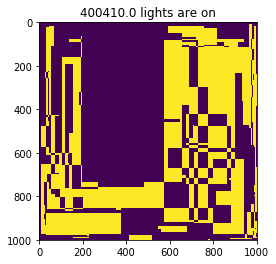

In [166]:
grid = np.zeros([1000,1000])

for i, cmd in enumerate(input_6):
    switch = re.findall("on|off", cmd)
    positions = [int(i) for i in re.findall("[\d]+", cmd)]
    toggle_lights(positions, switch)
    if i % 50 == 0:
        clear_output(wait=True)
        print(f"{grid.sum()} lights are on")
        plt.title(f"{grid.sum()} lights are on")
        plt.imshow(grid)
        plt.show()

clear_output(wait=True)
print(f"{grid.sum()} lights are on")
plt.title(f"{grid.sum()} lights are on")
plt.imshow(grid);

## Part 2

change above so:

- "on" increases brightness by 1
- "off" decreases brightness by 1 to a min of zero
- "toggle" increases brightness by 2

numpy makes this too easy:

In [184]:
def toggle_lights_2(positions, switch, lights=None):
    """takes in grid positions and switch setting and toggles lights"""
    x, y, xx, yy = positions
    if not switch:
        lights = 2
    else:
        if switch[0] == "on": 
            lights = 1
        elif switch[0] =="off":
            lights = -1
    
    grid[x:xx+1, y:yy+1] += lights
    grid[grid<0] = 0

Total brightness: 15343601.0


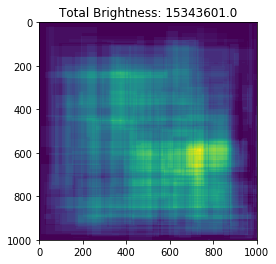

In [186]:
grid = np.zeros([1000,1000])

for i, cmd in enumerate(input_6):
    switch = re.findall("on|off", cmd)
    positions = [int(i) for i in re.findall("[\d]+", cmd)]
    toggle_lights_2(positions, switch)
    if i % 50 == 0:
        clear_output(wait=True)
        plt.title(f"{grid.sum()} lights are on")
        plt.imshow(grid)
        plt.show()

clear_output(wait=True)
print(f"Total brightness: {grid.sum()}")
plt.title(f"Total Brightness: {grid.sum()}")
plt.imshow(grid);

# Day 7

https://adventofcode.com/2015/day/7

We have a set of instructions which modify wires like so:

In [171]:
test_7 = """
123 -> x
456 -> y
x AND y -> d
x OR y -> e
x LSHIFT 2 -> f
y RSHIFT 2 -> g
NOT x -> h
NOT y -> i
""".strip().split("\n")
test_7[:4]

['123 -> x', '456 -> y', 'x AND y -> d', 'x OR y -> e']

In [234]:
wires = defaultdict(lambda: None)
wires["a"]

In [242]:
int(None)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [260]:
wires = defaultdict(lambda: None)

def get_wire(w, wires=wires):
    """if w is an int returns int(w) else returns the dictionary val"""
    try:
        wire = int(w)
    except:
        wire = wires[w]
    return wire

def do_op(op):
    if op[1] == "->":
        wires[op[2]] = get_wire(op[0])
    elif op[1] == "AND":
        wires[op[4]] = get_wire(op[0]) & get_wire(op[2])
    elif op[1] == "OR":
        wires[op[4]] = get_wire(op[0]) | get_wire(op[2])
    elif op[1] == "LSHIFT":
        wires[op[4]] = get_wire(op[0]) << get_wire(op[2])
    elif op[1] == "RSHIFT":
        wires[op[4]] = get_wire(op[0]) >> get_wire(op[2])
    elif op[0] == "NOT":
        wires[op[3]] = ~np.uint16(get_wire(op[1])) #& 0xffff
    else:
        print(f"Shouldn't have reached here: {op}")
        
for inst in test_7:
    do_op(inst.split(" "))
wires

defaultdict(<function __main__.<lambda>()>,
            {'x': 123,
             'y': 456,
             'd': 72,
             'e': 507,
             'f': 492,
             'g': 114,
             'h': 65412,
             'i': 65079})

So the test input passes, but I was failing on the actual test until I realized that some wires
now to try on the actual input:

In [261]:
wires = defaultdict(lambda: None)
input_7 = get_input(7).split("\n")
print(input_7[:5])

for i in tqdm_notebook(range(100)):
    for inst in input_7:
        inst = inst.split(" ")
        do_op(inst)
print(wires["a"])
wires

['NOT dq -> dr', 'kg OR kf -> kh', 'ep OR eo -> eq', '44430 -> b', 'NOT gs -> gt']


TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [251]:
wires["dq"]